In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance_matrix

import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [2]:
a = np.random.normal(size=1000)


In [3]:

nrep = 1000
d = 1000

distance_min = []
distance_min_std = []
distance_max = []
distance_max_std = []

distance_mean = []
distance_std = []

for d in [1,2,5,10,20,50,100,200,500,1000]:
    print("d=%s"%d)
    d_min = []
    d_max = []

    d_mean = []
    d_std = []

    for x in range(nrep):
        generate = []
        for x in range(d):
            generate = generate + [np.random.uniform(size=100)]
        data = pd.DataFrame(generate).T.values
        
        distances = distance_matrix(data,data).flatten()
        distances = distances[distances != 0] / math.sqrt(d)
        
        d_min += [distances.min()]
        d_max += [distances.max()]
        
        d_mean += [distances.mean()]
        d_std += [distances.std()]
        
    distance_min += [np.mean(d_min)]
    distance_min_std += [np.std(d_min)]
    
    distance_max += [np.mean(d_max)]
    distance_max_std += [np.std(d_max)]
    
    distance_mean += [np.mean(d_mean)]
    distance_std += [np.mean(d_std)]
        
        

d=1
d=2
d=5
d=10
d=20
d=50
d=100
d=200
d=500
d=1000


In [4]:
uiucblue = (19/255,42/255,76/255)
uiucred = (232/255,74/255,39/255)
kitgreen = (50/255,161/255,137/255)

<IPython.core.display.Javascript object>


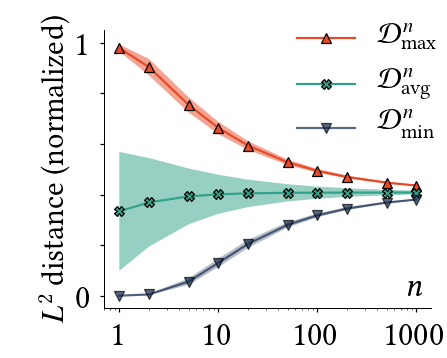

In [22]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(5,4), sharex=True, sharey=True)

ds = [1,2,5,10,20,50,100,200,500,1000]

plt.plot(ds, distance_max, label=r'$\mathcal{D}_{\text{max}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="^", color=uiucred)
plt.fill_between(ds,[x+y for x,y in zip(distance_max,distance_max_std)], 
                 [x-y for x,y in zip(distance_max,distance_max_std)], 
                 alpha=0.5, facecolor=uiucred)

plt.plot(ds, distance_mean, label=r'$\mathcal{D}_{\text{avg}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="X", color=kitgreen)
plt.fill_between(ds,[x+y for x,y in zip(distance_mean,distance_std)], 
                 [x-y for x,y in zip(distance_mean,distance_std)], 
                 alpha=0.5, facecolor=kitgreen)

plt.plot(ds, distance_min, alpha=0.7, label=r'$\mathcal{D}_{\text{min}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="v", color=uiucblue)
plt.fill_between(ds,[x+y for x,y in zip(distance_min,distance_min_std)], 
                 [x-y for x,y in zip(distance_min,distance_min_std)], 
                 alpha=0.3, facecolor=uiucblue)


plt.legend(fontsize=23, framealpha=0, loc="upper right", bbox_to_anchor=(1.1,1.1))
#plt.xlabel("$d$")
plt.ylabel("$L^2$ distance (normalized)")

#plt.title("The distance concentration effect", size=18)
    
plt.ylim((-0.05,1.05))
plt.xscale("log")
plt.text(800,0,r"\textit{n}", fontsize=27)

plt.tight_layout()
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0", "", "", "", "", "1"], fontsize=27)

plt.xticks([1,10,100,1000], ["1", "10", "100", "1000"], fontsize=27)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("cod_illustration.pdf")

<IPython.core.display.Javascript object>


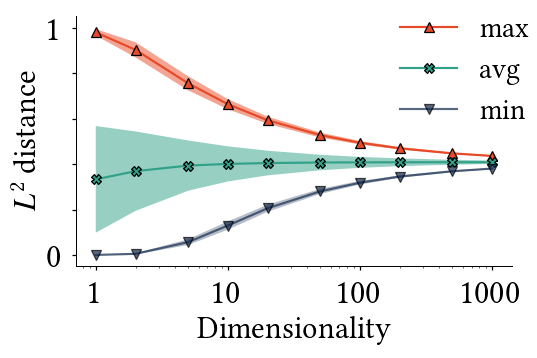

In [8]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(6,4), sharex=True, sharey=True)

ds = [1,2,5,10,20,50,100,200,500,1000]

plt.plot(ds, distance_max, label=r'max', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="^", color=uiucred)
plt.fill_between(ds,[x+y for x,y in zip(distance_max,distance_max_std)], 
                 [x-y for x,y in zip(distance_max,distance_max_std)], 
                 alpha=0.5, facecolor=uiucred)

plt.plot(ds, distance_mean, label=r'avg', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="X", color=kitgreen)
plt.fill_between(ds,[x+y for x,y in zip(distance_mean,distance_std)], 
                 [x-y for x,y in zip(distance_mean,distance_std)], 
                 alpha=0.5, facecolor=kitgreen)

plt.plot(ds, distance_min, alpha=0.7, label=r'min', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="v", color=uiucblue)
plt.fill_between(ds,[x+y for x,y in zip(distance_min,distance_min_std)], 
                 [x-y for x,y in zip(distance_min,distance_min_std)], 
                 alpha=0.3, facecolor=uiucblue)


plt.legend(fontsize=23, framealpha=0, loc="upper right", bbox_to_anchor=(1.1,1.1))
#plt.xlabel("$d$")
plt.ylabel("$L^2$ distance")

#plt.title("The distance concentration effect", size=18)
    
plt.ylim((-0.05,1.05))
plt.xscale("log")
#plt.text(800,0,r"\textit{n}", fontsize=27)

plt.tight_layout()
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0", "", "", "", "", "1"], fontsize=27)

plt.xticks([1,10,100,1000], ["1", "10", "100", "1000"], fontsize=27)

plt.xlabel("Dimensionality")

#plt.title("The distance-concentration effect")
ttl = axarr.title
ttl.set_position([.5, 1.05])

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("cod_illustration_2.pdf")

In [255]:
distance_mean

[0.33372659018358602,
 0.3685100108653554,
 0.39264736047807153,
 0.40097575284935977,
 0.40474370205876181,
 0.40678766352926871,
 0.40744755233881413,
 0.40794662865547482,
 0.40813337557692903,
 0.408169908855954]

In [256]:
distance_std

[0.23523150236615353,
 0.17470181882784189,
 0.11043939315892455,
 0.077330701552365613,
 0.054222926981484496,
 0.034183062383168032,
 0.024112805077056813,
 0.017033124231147355,
 0.010773901519859979,
 0.007608576959855496]